In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
import seaborn as sns

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,50.776,50.761000,50.746000,50.730000,50.715000,50.700000,...,42.957000,42.990000,43.041000,43.108000,43.192000,43.293000,43.411000,43.546000,43.697000,43.866000
1,Aruba,ABW,Urban population,SP.URB.TOTL,27728.000,28330.000000,28764.000000,29157.000000,29505.000000,29802.000000,...,43864.000000,44228.000000,44588.000000,44943.000000,45297.000000,45648.000000,45999.000000,46351.000000,46574.000000,46734.000000
2,Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,NaN,2.147858,1.520329,1.357042,1.186472,1.001576,...,0.849393,0.826413,0.810669,0.793026,0.784578,0.771899,0.765986,0.762321,0.479958,0.342951
3,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.000,55811.000000,56682.000000,57475.000000,58178.000000,58782.000000,...,102112.000000,102880.000000,103594.000000,104257.000000,104874.000000,105439.000000,105962.000000,106442.000000,106585.000000,106537.000000
4,Aruba,ABW,Population growth (annual %),SP.POP.GROW,NaN,2.179059,1.548572,1.389337,1.215721,1.032841,...,0.810231,0.749301,0.691615,0.637959,0.590062,0.537296,0.494795,0.451970,0.134255,-0.045045


# Cleaning the Data

In [4]:
def summary_stats(df, wide=True):
    """Takes in a dataframe and prints the number of rows, columns and missing values.""" 
    print(f"""Number of rows{" (i.e. countries)" if wide else ""} in the dataframe: {df.shape[0]:,}
Number of columns{" (i.e. indicators)" if wide else ""} in the dataframe: {df.shape[1]}
Number of missing values in the dataframe: {df.isna().sum().sum():,}""")

In [5]:
summary_stats(df, False)


Number of rows in the dataframe: 20,216
Number of columns in the dataframe: 66
Number of missing values in the dataframe: 730,641


In [6]:
iso_countries = ['AFG', 'ALB', 'DZA', 'ASM', 'AND', 'AGO', 'ATG', 'ARG', 'ARM', 'ABW', 'AUS', 'AUT', 'AZE', 'BHS', 'SXM',
                 'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 'VGB', 'BRN',
                 'BGR', 'BFA', 'BDI', 'CPV', 'KHM', 'CMR', 'CAN', 'CYM', 'CAF', 'TCD', 'CHI', 'CHL', 'CHN', 'COL', 'COM',
                 'COD', 'COG', 'CRI', 'CIV', 'HRV', 'CUB', 'CUW', 'CYP', 'CZE', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY',
                 'SLV', 'GNQ', 'ERI', 'EST', 'SWZ', 'ETH', 'FRO', 'FJI', 'FIN', 'FRA', 'PYF', 'GAB', 'GMB', 'GEO', 'DEU',
                 'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GUM', 'GTM', 'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HKG', 'HUN', 'ISL',
                 'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'IMN', 'ISR', 'ITA', 'JAM', 'JPN', 'JOR', 'KAZ', 'KEN', 'KIR', 'PRK',
                 'KOR', 'XKX', 'KWT', 'KGZ', 'LAO', 'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'LTU', 'LUX', 'MAC', 'MDG',
                 'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MHL', 'MRT', 'MUS', 'MEX', 'FSM', 'MDA', 'MCO', 'MNG', 'MNE', 'MAR',
                 'MOZ', 'MMR', 'NAM', 'NRU', 'NPL', 'NLD', 'NCL', 'NZL', 'NIC', 'NER', 'NGA', 'MKD', 'MNP', 'NOR', 'OMN',
                 'PAK', 'PLW', 'PAN', 'PNG', 'PRY', 'PER', 'PHL', 'POL', 'PRT', 'PRI', 'QAT', 'ROU', 'RUS', 'RWA', 'WSM',
                 'SMR', 'STP', 'SAU', 'SEN', 'SRB', 'SYC', 'SLE', 'SGP', 'SVK', 'SVN', 'SLB', 'SOM', 'ZAF', 'SSD', 'ESP',
                 'LKA', 'KNA', 'LCA', 'MAF', 'VCT', 'SDN', 'SUR', 'SWE', 'CHE', 'SYR', 'TJK', 'TZA', 'THA', 'TLS', 'TGO',
                 'TON', 'TTO', 'TUN', 'TUR', 'TKM', 'TCA', 'TUV', 'UGA', 'UKR', 'ARE', 'GBR', 'USA', 'URY', 'UZB', 'VUT',
                 'VEN', 'VNM', 'VIR', 'PSE', 'YEM', 'ZMB', 'ZWE']
df = df[df['Country Code'].isin(iso_countries)]
print("Number of countries:", df['Country Code'].nunique())

Number of countries: 217


In [7]:
summary_stats(df, False)


Number of rows in the dataframe: 16,492
Number of columns in the dataframe: 66
Number of missing values in the dataframe: 599,405


In [8]:
len(iso_countries)


217

In [9]:
df = df.iloc[:,:-1] # The last column is full of missing values and so we can drop it.


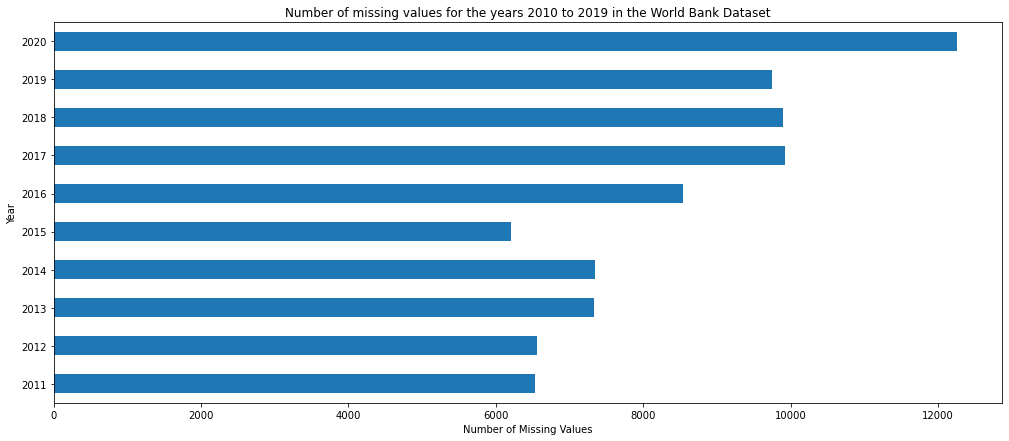

In [10]:
plt.figure(figsize=(17,7))
df.iloc[:, -10:].isna().sum().plot(kind='barh')
plt.title('Number of missing values for the years 2010 to 2019 in the World Bank Dataset')
plt.ylabel('Year')
plt.xlabel('Number of Missing Values');

In [11]:
df_2017 = df[['Country Name', 'Indicator Name', '2017']]


In [12]:
summary_stats(df_2017, False)

Number of rows in the dataframe: 16,492
Number of columns in the dataframe: 3
Number of missing values in the dataframe: 9,920


In [13]:
# changing the dataframe shape to make it easier to identify and remove missing values
df_wide = df_2017.pivot_table(values='2017', index='Country Name', columns='Indicator Name')

In [14]:
df_wide.head(2)


Indicator Name,Access to electricity (% of population),Agricultural irrigated land (% of total agricultural land),Agricultural land (% of land area),Agricultural land (sq. km),"Agriculture, forestry, and fishing, value added (% of GDP)","Annual freshwater withdrawals, total (% of internal resources)","Annual freshwater withdrawals, total (billion cubic meters)",Arable land (% of land area),Average precipitation in depth (mm per year),CO2 emissions (kg per 2015 US$ of GDP),...,"Primary completion rate, total (% of relevant age group)",Renewable electricity output (% of total electricity output),Renewable energy consumption (% of total final energy consumption),"School enrollment, primary and secondary (gross), gender parity index (GPI)",Terrestrial and marine protected areas (% of total territorial area),Terrestrial protected areas (% of total land area),Total greenhouse gas emissions (kt of CO2 equivalent),Urban population,Urban population (% of total population),Urban population growth (annual %)
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,97.699997,5.990504,58.123668,379100.00,26.420199,43.015907,20.282,11.804118,327.0,0.227711,...,84.414948,NaN,19.21,0.64169,0.104707,0.104707,26530.000687,8999963.0,25.250,3.781557
Albania,99.889999,14.562102,42.856971,11742.81,19.022149,4.055762,1.091,22.335766,1485.0,0.420910,...,101.983704,NaN,37.07,1.00432,13.525683,17.736095,9659.999847,1706345.0,59.383,1.541285


In [15]:
summary_stats(df_wide)


Number of rows (i.e. countries) in the dataframe: 217
Number of columns (i.e. indicators) in the dataframe: 39
Number of missing values in the dataframe: 1,891


In [16]:
df_wide = df_wide.dropna(axis=1, thresh=168) # selecting the indicators at least 168 countries


In [17]:
summary_stats(df_wide)


Number of rows (i.e. countries) in the dataframe: 217
Number of columns (i.e. indicators) in the dataframe: 30
Number of missing values in the dataframe: 549


In [20]:
df_wide = df_wide.fillna(df_wide.mean())


In [21]:
summary_stats(df_wide)

Number of rows (i.e. countries) in the dataframe: 217
Number of columns (i.e. indicators) in the dataframe: 30
Number of missing values in the dataframe: 0


# Clustering

In [22]:
X = df_wide.values
country_names = list(df_wide.index)

In [23]:
from sklearn.preprocessing import StandardScaler
ss1 = StandardScaler()
X_ss1 = ss1.fit_transform(X)

In [60]:
# empty list for inertia values
inertia = []

for i in range(1,10):
    # instantiating a kmeans model with i clusters
    kmeans = KMeans(n_clusters=i)
    
    # fitting the model to the data
    kmeans.fit(df_wide)
    
    # appending the inertia of the model to the list
    inertia.append(kmeans.inertia_)
    
    # ignore this if statement
    if i == 3:
        elbow = kmeans.inertia_

# creating a list with the number of clusters
number_of_clusters = range(1,10)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f8a39a283a0>
Traceback (most recent call last):
  File "/home/sky/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/sky/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/sky/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/sky/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_ca

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f8a39a0b670>
Traceback (most recent call last):
  File "/home/sky/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/sky/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/sky/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/sky/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_ca

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f8a39a0b670>
Traceback (most recent call last):
  File "/home/sky/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/sky/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/sky/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/sky/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_ca

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f8a399b4c10>
Traceback (most recent call last):
  File "/home/sky/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/sky/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/sky/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/sky/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_ca

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f8a39a283a0>
Traceback (most recent call last):
  File "/home/sky/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/sky/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/sky/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/sky/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_ca

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f8a39a283a0>
Traceback (most recent call last):
  File "/home/sky/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/sky/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/sky/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/sky/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_ca

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f8a399b4c10>
Traceback (most recent call last):
  File "/home/sky/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/sky/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/sky/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/sky/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_ca

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f8a52bae820>
Traceback (most recent call last):
  File "/home/sky/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/sky/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/sky/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/sky/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_ca

    self.version = self.get_version()
  File "/home/sky/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f8a39a283a0>
Traceback (most recent call last):
  File "/home/sky/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/sky/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/sky/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/sky/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
  

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f8a39a283a0>
Traceback (most recent call last):
  File "/home/sky/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/sky/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/sky/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/sky/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_ca

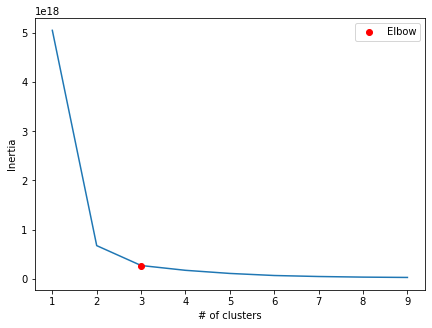

In [61]:
ig = plt.figure(figsize=[7,5])
plt.plot(number_of_clusters, inertia)
plt.plot(3, elbow, 'ro', label='Elbow')
plt.legend()
plt.xlabel('# of clusters')
plt.ylabel('Inertia')
plt.savefig("inertia_plot.png")
plt.show()

In [70]:
def clust(k, std_data):
    kmeans = KMeans(k)
    clusters = kmeans.fit_predict(std_data)
    plt.scatter(df_wide["CO2 emissions (kg per PPP $ of GDP)"],df_wide["CO2 emissions (metric tons per capita)"], c=clusters, cmap='rainbow')

    plt.xlabel('CO2 emissions (kg per PPP $ of GDP')
    plt.ylabel('CO2 emissions (metric tons per capita)')

    plt.show()

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f8a398bb310>
Traceback (most recent call last):
  File "/home/sky/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/sky/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/sky/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/sky/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_ca

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f8a39a93d30>
Traceback (most recent call last):
  File "/home/sky/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/sky/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/sky/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/sky/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


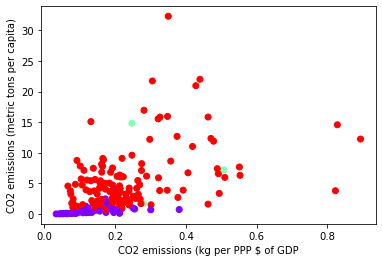

In [71]:
clust(3, X_ss1)

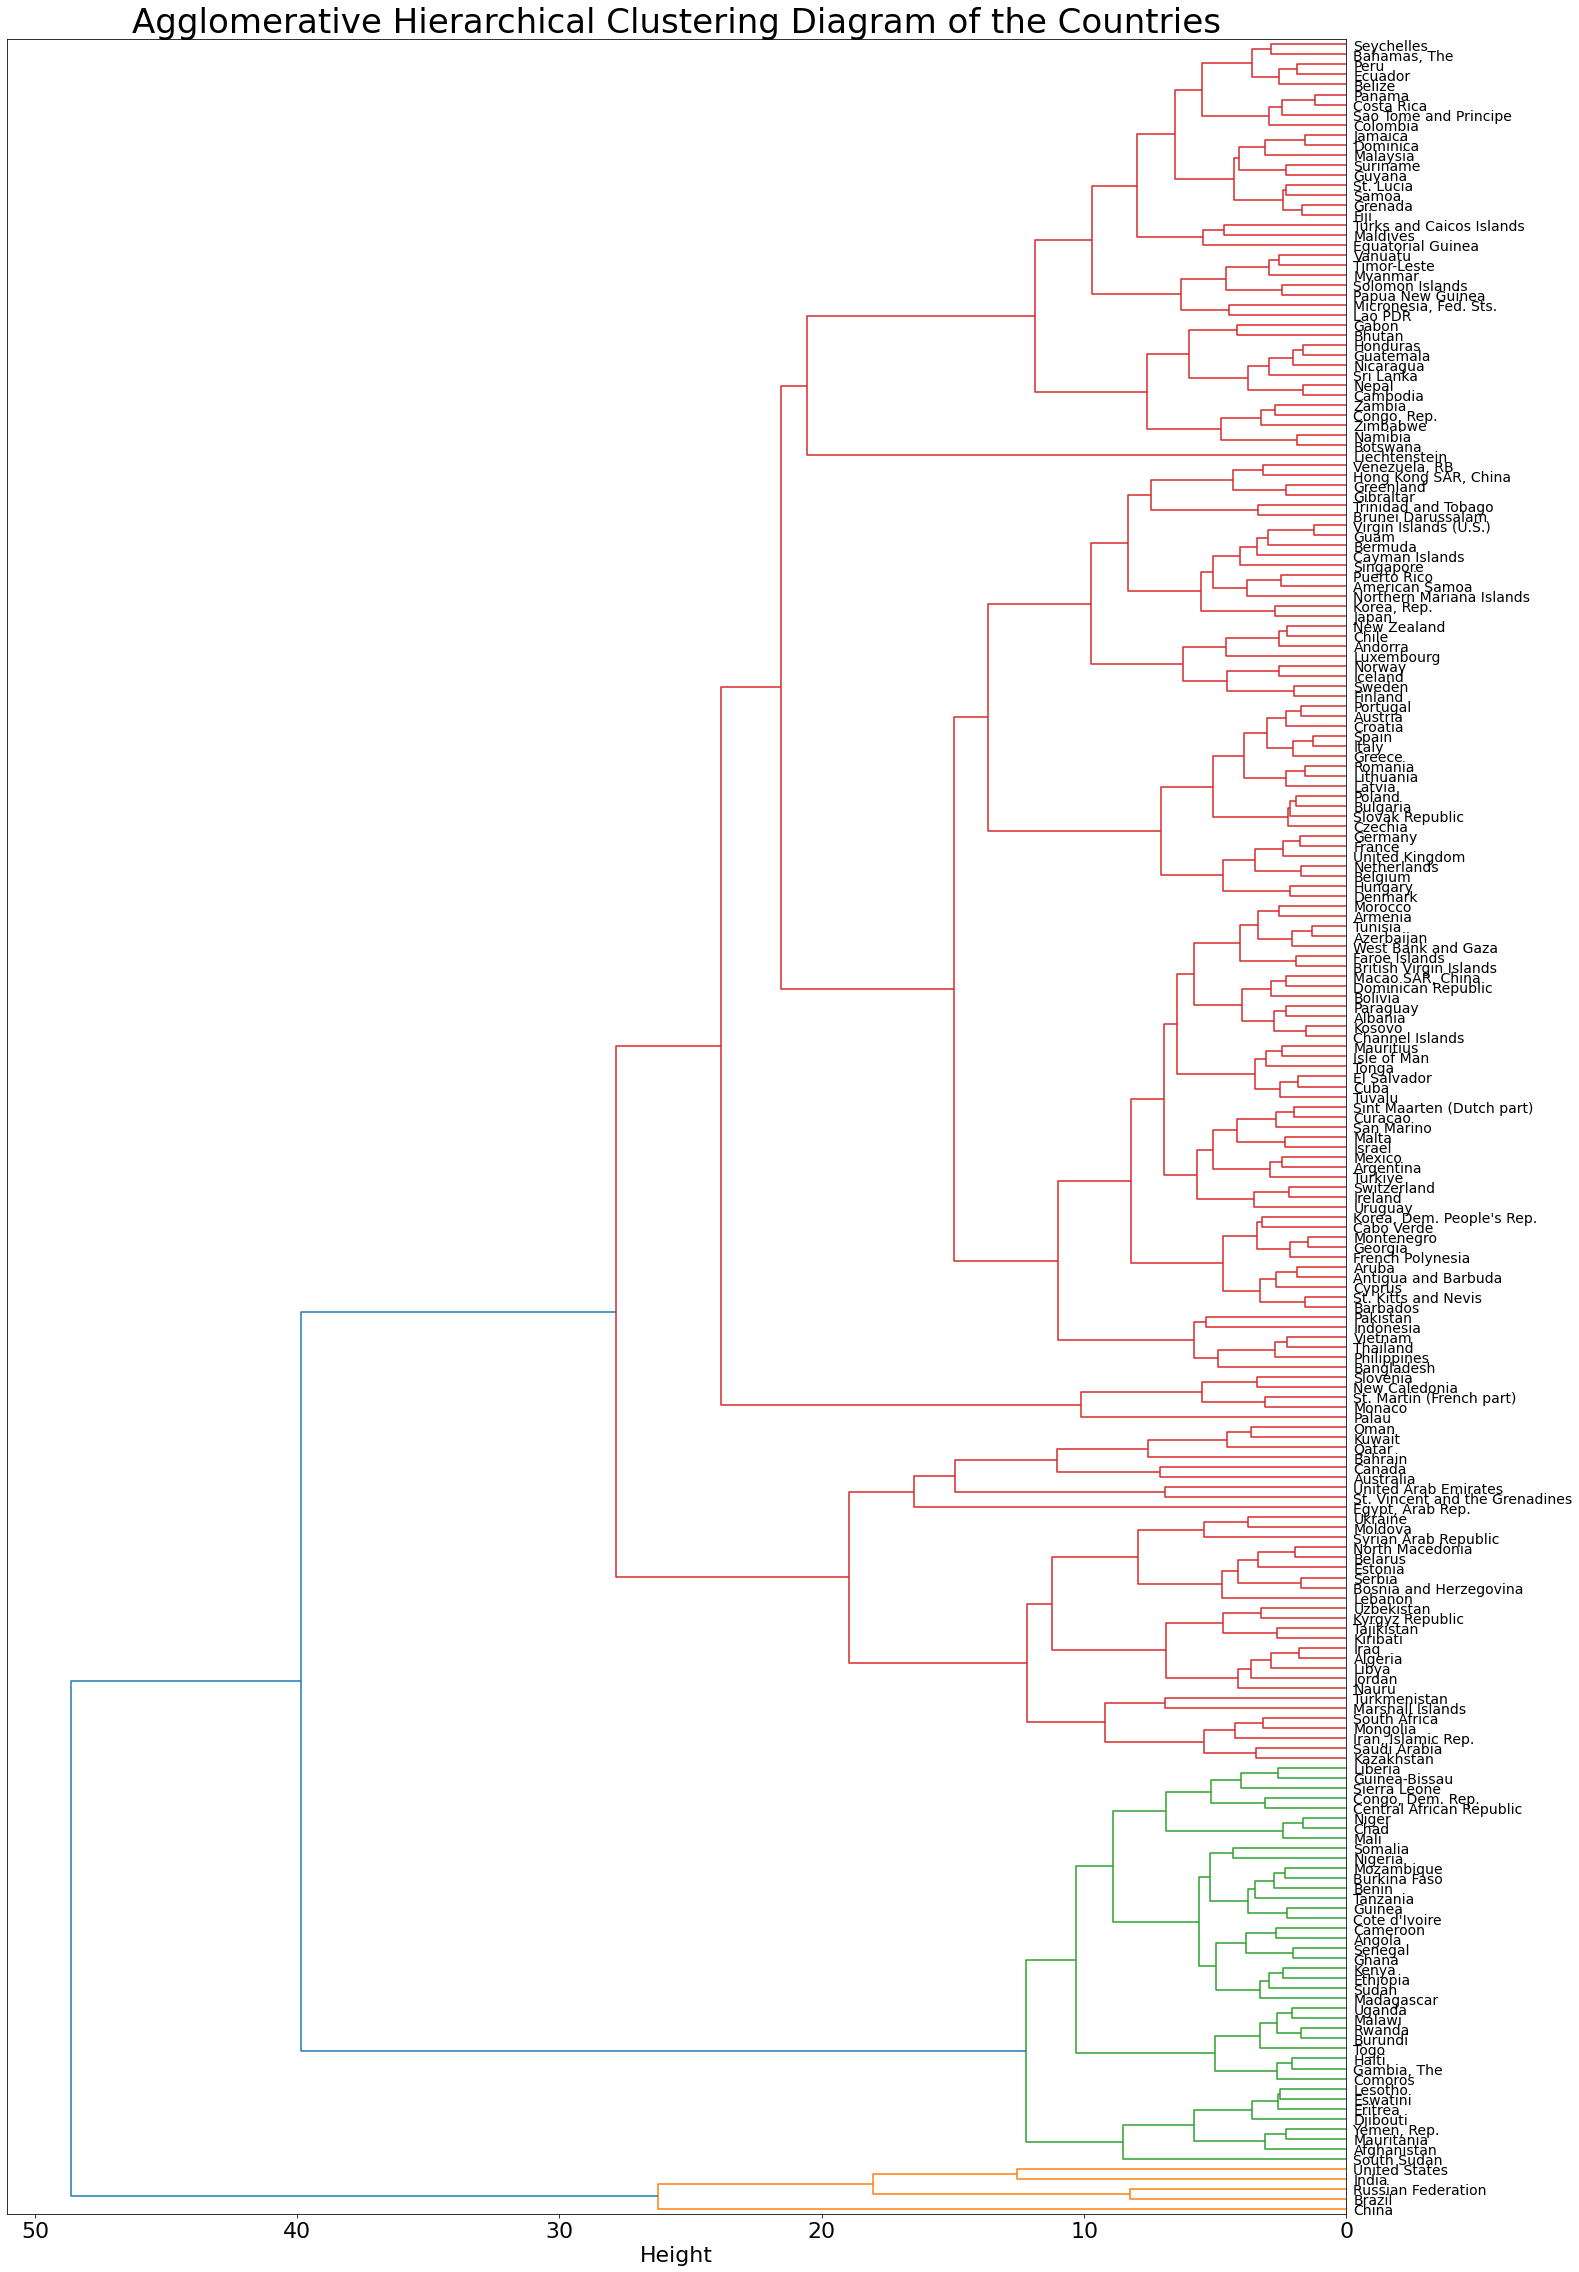

In [25]:
fig, ax = plt.subplots(figsize=(24,40))
sch.dendrogram(sch.linkage(X_ss1, method='ward'), labels=country_names, orientation='left', leaf_font_size=8)
ax.tick_params(axis='y', which='major', labelsize=14)
ax.tick_params(axis='x', which='major', labelsize=22)
ax.set_title('Agglomerative Hierarchical Clustering Diagram of the Countries', size=34);
ax.set_xlabel('Height', size=22)
fig.savefig(r'County Clustering with Population Dependent Indicators.png');


In [26]:
# Clustering adjusting for Population

In [27]:
summary_stats(df_wide)


Number of rows (i.e. countries) in the dataframe: 217
Number of columns (i.e. indicators) in the dataframe: 30
Number of missing values in the dataframe: 0


In [28]:
df_wide_non_pop = df_wide.filter(regex='|'.join(['%', ' per ', ' index ', 'days']) ) #selecting columns with population adjusted titles


In [29]:
summary_stats(df_wide_non_pop)


Number of rows (i.e. countries) in the dataframe: 217
Number of columns (i.e. indicators) in the dataframe: 20
Number of missing values in the dataframe: 0


In [30]:
print(df_wide_non_pop.columns.tolist()) # a list of all 277 indicators used in the final analysis


['Access to electricity (% of population)', 'Agricultural land (% of land area)', 'Agriculture, forestry, and fishing, value added (% of GDP)', 'Annual freshwater withdrawals, total (% of internal resources)', 'Arable land (% of land area)', 'Average precipitation in depth (mm per year)', 'CO2 emissions (kg per 2015 US$ of GDP)', 'CO2 emissions (kg per 2017 PPP $ of GDP)', 'CO2 emissions (kg per PPP $ of GDP)', 'CO2 emissions (metric tons per capita)', 'Cereal yield (kg per hectare)', 'Foreign direct investment, net inflows (% of GDP)', 'Forest area (% of land area)', 'Marine protected areas (% of territorial waters)', 'Population growth (annual %)', 'Renewable energy consumption (% of total final energy consumption)', 'Terrestrial and marine protected areas (% of total territorial area)', 'Terrestrial protected areas (% of total land area)', 'Urban population (% of total population)', 'Urban population growth (annual %)']


In [31]:
X = df_wide_non_pop.values
country_names = list(df_wide_non_pop.index)

In [32]:
ss2 = StandardScaler()
X_ss2 = ss2.fit_transform(X)

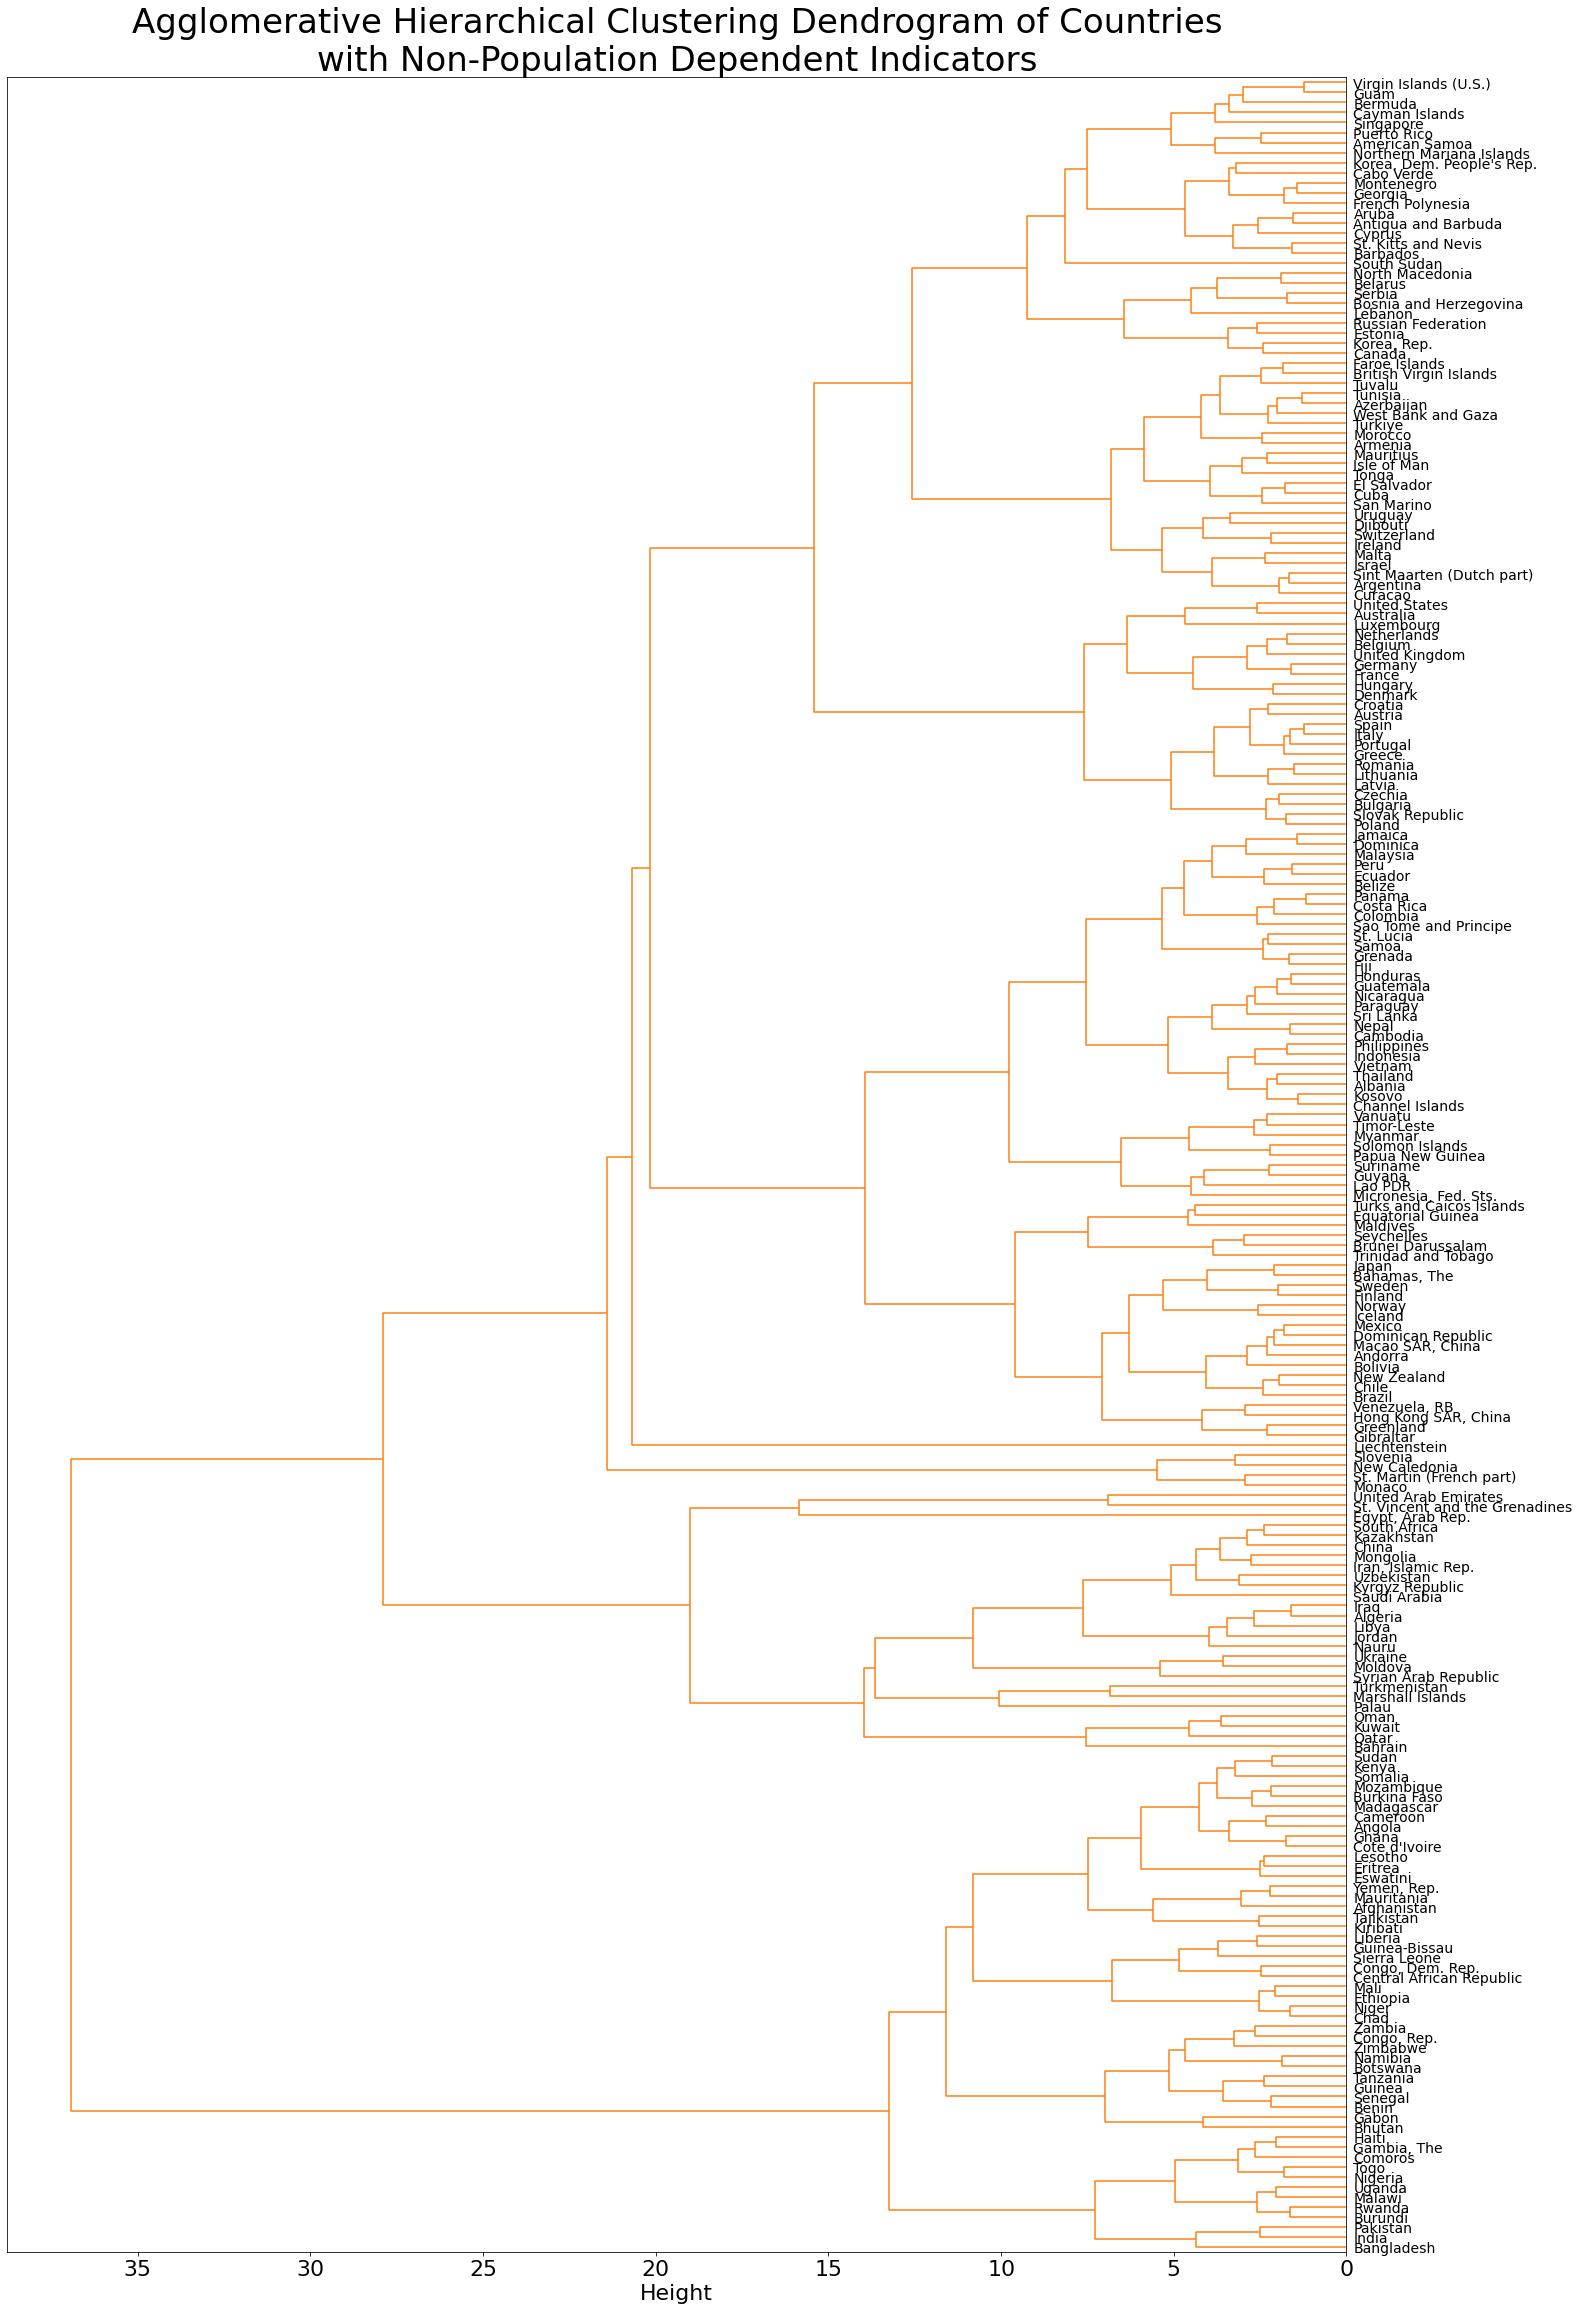

In [33]:
fig, ax = plt.subplots(figsize=(24,40))
sch.dendrogram(sch.linkage(X_ss2, method='ward'), labels=country_names, 
               orientation='left', leaf_font_size=8, color_threshold=37)
ax.tick_params(axis='y', which='major', labelsize=14)
ax.tick_params(axis='x', which='major', labelsize=22)
ax.set_title('Agglomerative Hierarchical Clustering Dendrogram of Countries\nwith Non-Population Dependent Indicators', size=34);
ax.set_xlabel('Height', size=22)
fig.savefig(r'County Clustering with Non-Population Dependent Indicators.png');